# SymPy

## Introducción 
La computación simbólica sirve para hacer cálculos computacionales de manera simbólica, lo cual significa que los objetos matemáticos buscan ser representados de manera exacta y no mediante aproximaciones, por ejemplo...

In [1]:
import math
math.sqrt(9)

3.0

In [2]:
math.sqrt(8)

2.8284271247461903

In [3]:
import sympy
sympy.sqrt(8)

2*sqrt(2)

Con SymPy, las raíces cuadradas de numeros que no son cuadrados perfectos, no se evalúan por default

In [4]:
from sympy import init_printing
#Existen muchas formas de imprimir algo, las más comunes son:
#LaTeX, Dot, ASCII pretty printer, unicode pretty printer etc
#si sólo queremos que nuestra expresión se vea bonita, usamos init_printing()
init_printing()
sympy.sqrt(8)


# Manejo de símbolos

In [5]:
from sympy import symbols,S,exp
x=symbols('x')
x

In [6]:
exp(2)

In [7]:
x+1

In [53]:
x*3 + S(1)/2

In [9]:
x*3 + 1/2

In [10]:
y = symbols('y')
expr1 = exp(x) + x**2
expr1

In [11]:
print(expr1)

x**2 + exp(x)


In [12]:
expr2 = y**2 + 3*y-2
expr2

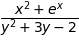

In [13]:
expr3 = expr1/expr2
expr3

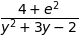

In [14]:
expr3.subs(x,2) #Sustituye el valor de x por 2

In [15]:
expr4 = x + S(1)/2 + x**2 
expr4

In [16]:
expr5 = x+3*x**2
expr5

In [17]:
expr4 + expr5

# Simplificación 

In [18]:
from sympy import simplify,sin,cos,expand
x,y,z = symbols('x y z')
uno = sin(x)**2 + cos(x)**2
uno

In [19]:
simplify(uno)

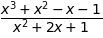

In [20]:
wea = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
wea

In [21]:
simplify(wea)

In [22]:
#Ahora, veamos la función expand para desarrollar expresiones
bincuadr = (x+1)**2
bincuadr

In [23]:
expand(bincuadr)

# Sustitución y evaluación

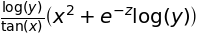

In [24]:
from sympy import tan, log, evalf
expr = (x**2 + log(y)/exp(z))/tan(x)*log(y)
expr

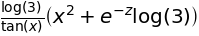

In [25]:
#Subs es un método que se aplica a una expresión, lo que hace es sustituir el símbolo indicado como primer argumento por lo
#que le pasemos como segundo argumento.

expr.subs(y,3)

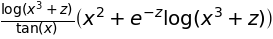

In [26]:
#Como se observa, no hace únicamente sustituciones por números o variables, sino que puede llevarse a cabo composición de funciones




expr.subs(y,x**3 + z)

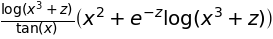

In [27]:
expr2 = expr.subs(y,x**3+z)
expr2

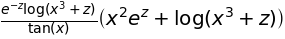

In [28]:
simplificada = simplify(expr2)
simplificada

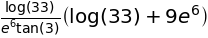

In [29]:
#También es posible hacer sustituciones en expresiones multivariable
evaluada = simplificada.subs([(x,3),(y,2),(z,6)])
evaluada

In [30]:
#Para obtener el valor numérico de una expresión simbólica, usamos el método evalf.
#El argumento indica el número de dígitos con el cualqueremos que la cifra sea expresada
evaluada.evalf(5)

In [31]:
evaluada.evalf(10)

In [32]:
evaluada.evalf()

# Lambdify


Este módulo provee funciones para transformar expresiones de sympy en funciones lambda, que pueden usarse para hacer calculos MUY VELOCES.

In [33]:
from sympy import lambdify
import numpy as np
a = np.arange(10)
x = symbols('x')
expr = ((x+1)**2 + 1)**2
expr

In [34]:
expr = expr.subs(x,x**2)
expr

In [35]:
%%timeit
lista = []
for i in range(1000):
    resultado = expr.subs(x,i).evalf()
    lista.append(resultado)
    
#Mucho ojo en la velocidad, expresada en milisegundos para este caso

885 ms ± 8.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
a = np.arange(1000)
f = lambdify(x,expr,'numpy') #(argumentos, expresión, módulos)
f(a)

#WTF!!!! hizo exactamente lo mismo que la linea anterior pero mucho menos tiempo!!!

2.62 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Cálculo

In [37]:
from sympy import diff,limit,oo,integrate

In [38]:
x,y = symbols('x y')
expr = x**3 + 2*x**2 + 5*x + 8
expr

In [39]:
derivada = diff(expr,x)#(expresión, variable respecto a la cual se deriva, orden de la derivada)
derivada

In [40]:
diff(expr,x,2)

In [41]:
expr2 = 3*y*x**3 + y**3
expr2

In [42]:
diff(expr2,y,3)

In [43]:
expr3 = 1/x
expr3

In [44]:
limit(expr3,x,3)

In [45]:
limit(expr3,x,0)

In [46]:
limit(expr3,x,oo) # oo es la expresión de infinito

In [47]:
#para integrar: integrate(expr,(variable,lim inf, lim sup))
integrate(expr3,x)

In [48]:
expr4 = cos(x) ** 2 +3
expr4

In [49]:
integrate(expr4,x)

In [50]:
integrada = integrate(expr4,(x,0,3))
integrada

In [51]:
integrada.evalf() 